#### CS164 Assignment 2

### Constrained Optimization & The KKT Conditions
_Yoav Rabinovich, April 2020_

______________________


[Link to GitHub](https://github.com/Shesh6/CS164--Optimization-Methods/blob/master/Assignment%202%20-%20Constrained%20Optimization%20%26%20KKT%20Conditions.ipynb).
[Link to NBViewer](https://nbviewer.jupyter.org/github/Shesh6/CS164--Optimization-Methods/blob/master/Assignment%202%20-%20Constrained%20Optimization%20%26%20KKT%20Conditions.ipynb).

#### Part 1

_A linear program can be written in the form_
$$\begin{align*}
\min_\boldsymbol{x} \ &f(\boldsymbol{x}) = \boldsymbol{c}^T \boldsymbol{x} \\
\text{s.t:} \ &\boldsymbol{g}(\boldsymbol{x}) = A\boldsymbol{x}\leq \boldsymbol{b},
\end{align*}$$

_for matrices $A \in \mathbb{R}^{n\times m}, \boldsymbol{b} \in \mathbb{R}^{1\times m}$ and $\boldsymbol{c} \in \mathbb{R}^{1\times n}$._

_Write down the KKT conditions for this
LP and explain why the optimal solution will in general never be found in the interior of the feasible region and will always be on a vertex or facet._

The KKT conditions for this problem, defining the  follow:

- Without equality constraints, we need $m$ multipliers to solve this problem. We constrain them to be non-negative:
$$\boldsymbol{\mu} \in \mathbb{R}^{1\times m}_+$$

- The *Stationarity constraint for minimization* makes sure the solution is optimal by ensuring that the gradients of the objective function and the weighted constraints add up to the zero vector:
$$\begin{align*}
&\nabla_\mathbf{x} f(\mathbf{x}) + \boldsymbol{\mu}^T \nabla_\mathbf{x} \boldsymbol{g}(\mathbf{x}) \\
= \ &\boldsymbol{c}+\boldsymbol{\mu}^T A =\mathbf{0}
\end{align*}$$

- The *Complementary slackness constraint* makes sure that only active constraints have non-zero multiplers:

$$\begin{align*}
&\boldsymbol{\mu}^Tg(\mathbf{x}) \\
= \ &\boldsymbol{\mu}^T(A\boldsymbol{x} - \boldsymbol{b})=\mathbf{0} 
\end{align*}$$

- No equality constraints are needed.

Since the objective function of a linear program is linear, it has no optimum points in any bounded domain, so the solution cannot be in the interior of the domain. If the objective function happens to be perpendicular to one of the boundary facets, the facet will be parallel to a level set and comprise a solution, as the function attains its optimal value in the domain at any point on the boundary line. In any other case, we are left with only vertices as possible solution points.

#### Part 2

_Show how the $l_1$ and $l_\infty$ regression problems can be expressed as linear programs, by defining slack variables and inequality constraints as needed._

The one-norm problem
$$\begin{align*}
\min_\boldsymbol{x} \ &||\boldsymbol{x}||_1 \\
\text{s.t:} \ &A\boldsymbol{x}\leq \boldsymbol{b},
\end{align*}$$

where $||\boldsymbol{x}||_1 = \sum_i |x_i|$ isn't in canonical form. We can transform it by introducing a slack vector $\boldsymbol{s}\in \mathbb{R}^{1\times n}_+$ such that $-s_i\leq x_i \leq s_i$ for each element $i$ of both vectors. This means that $s_i$ provides an upper bound for $|x_i|$, and that by arranging the problem such that we minimize $\boldsymbol{s}$, we'd be minimizing $||\boldsymbol{x}||_1$ by extension.

We introduce the new constraints accompanying the slack vector as such:
$$\begin{align*}
\boldsymbol{x}\leq \boldsymbol{s} &\rightarrow \boldsymbol{x} - \boldsymbol{s} \leq 0 \\
-\boldsymbol{s}\leq \boldsymbol{x} &\rightarrow - \boldsymbol{x} - \boldsymbol{s} \leq 0
\end{align*}$$

and append them to our constraint matrix:
$$\begin{align*}
&\begin{bmatrix} A & 0 \\ I & -I \\ -I & -I\end{bmatrix}\begin{bmatrix}\boldsymbol{x} \\ \boldsymbol{s} \end{bmatrix} = \begin{bmatrix}\boldsymbol{b} \\0\\0 \end{bmatrix} \\
\rightarrow &A^*\boldsymbol{x}^* = \boldsymbol{b}^*
\end{align*}$$

Now we can define our linear program in canonical form, taking the sum of $\boldsymbol{s}$ through product with a row-one-vector:
$$\begin{align*}
\min_{\boldsymbol{x},\boldsymbol{s}} \ &\boldsymbol{1}\times\boldsymbol{s} \\
\text{s.t:} \ &A^*\boldsymbol{x}^*\leq \boldsymbol{b}^*,
\end{align*}$$

The infinity-norm problem
$$\begin{align*}
\min_\boldsymbol{x} \ &||\boldsymbol{x}||_\infty \\
\text{s.t:} \ &A\boldsymbol{x}\leq \boldsymbol{b},
\end{align*}$$

where $||\boldsymbol{x}||_\infty = \max |x_i|$ isn't in canonical form either. We can transform it very similarly, by introducing a slack variable $s \in \mathbb{R}_+$ such that $-s\leq x_i \leq s$ for each element $i$ in $\boldsymbol{x}$. This means that $s$ provides an upper bound for $|x_i|$, and that by arranging the problem such that we minimize $\boldsymbol{s}$, we'd be minimizing $||\boldsymbol{x}||_\infty$ by extension.

We can use a single value for $s$ this time because we need only minimize a single element of $\boldsymbol{x}$ for the infinity-norm, and we'll multiply $s$ by a column-one-vector of size $n$ to integrate the new constraints into the existing ones:
$$\begin{align*}
\boldsymbol{x}\leq s\times \boldsymbol{1} &\rightarrow \boldsymbol{x} - s\times \boldsymbol{1} \leq 0 \\
-s\times \boldsymbol{1}\leq \boldsymbol{x} &\rightarrow - \boldsymbol{x} - s\times \boldsymbol{1} \leq 0
\end{align*}$$

We can append them to our constraint matrix:
$$\begin{align*}
&\begin{bmatrix} A & 0 \\ I & -I \\ -I & -I\end{bmatrix}\begin{bmatrix}\boldsymbol{x} \\ s\times \boldsymbol{1} \end{bmatrix} = \begin{bmatrix}\boldsymbol{b} \\0\\0 \end{bmatrix} \\
\rightarrow &A^*\boldsymbol{x}^* = \boldsymbol{b}^*
\end{align*}$$

Now we can define our linear program in canonical form:
$$\begin{align*}
\min_{\boldsymbol{x},s} \ &s \\
\text{s.t:} \ &A^*\boldsymbol{x}^*\leq \boldsymbol{b}^*,
\end{align*}$$

#### Part 3

_Download the code template linked in the assignment description on ALF. This code generates a synthetic dataset for testing regression algorithms [here](http://nbviewer.jupyter.org/github/rohanshekhar/CS164/blob/master/lpregression.ipynb). Use the CVXPY package to solve both the $l_1$ and $l_\infty$ optimization problems, and compute the parameters that define the line of best fit for each. Plot both lines in different colours over the scatter plot of the random datapoints._

As I was implementing the solution above using numpy to construct the constraint metrix and vectors where $\boldsymbol{x}=Y-X\Theta$, I ran into problems with numpy's handling of concatenation of arrays of expressions with unkown dimensions. As an alternative, I simply used $Y-X\Theta \leq \boldsymbol{S}$ and $Y-X\Theta \geq -\boldsymbol{S}$ as equivalent expressions of the constraints. The original code is kept but commented out below.

In [0]:
# l_1 and l_infinity regression using cvxpy
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt

# generate a synthetic dataset

# actual parameter values
theta1_act = 2
theta2_act = 5

# Number of points in dataset
N = 200

# Noise magnitude
mag = 30

# datapoints
x = np.arange(0,N)
y = theta1_act * x + theta2_act *np.ones([1,N]) + np.random.normal(0,mag,N)


In [0]:
# Redefine parameters
n = N
ones = np.ones(n).reshape(n,1)
X = x.reshape(n,1)
X = np.hstack((X,ones))
Y = y.flatten()

# Define the variables
T_1 = cvx.Variable(2)
T_i = cvx.Variable(2)
S = cvx.Variable(n)
s = cvx.Variable()

# Define the objective functions
obj_1 = cvx.Minimize(ones.T@S)
obj_i = cvx.Minimize(s)

# Define the constraints

# Failed numpy attempt
# eye = np.eye(n)
# neye = -eye
# A = np.block([[eye,neye],[neye,neye]])
# u_1 = np.vstack((Y-X@T_1,S))
# u_i = np.vstack((Y-X@T_i,s*ones))
# b = np.zeros(n*2)
# con_1 = [A[i]@u_1<=b[i] for i in range(0,2*n)]
# con_i = [A[i]@u_i<=b[i] for i in range(0,2*n)]

con_1 = [Y-X@T_1<=S,Y-X@T_1>=-S]
con_i = [Y-X@T_i<=s,Y-X@T_i>=-s]

# Solve the optimization problem
prob_1 = cvx.Problem(obj_1,con_1)
prob_i = cvx.Problem(obj_i,con_i)
prob_1.solve();
prob_i.solve();

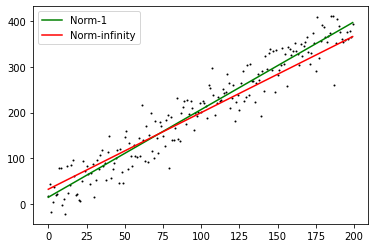

In [48]:
# Plot

l_1 = x*T_1.value[0]+T_1.value[1]
l_i = x*T_i.value[0]+T_i.value[1]

plt.figure()
plt.scatter(x,y,c="k",s=1)
plt.plot(x,l_1,c="g",label="Norm-1")
plt.plot(x,l_i,c="r",label="Norm-infinity")
plt.legend()
plt.show()